<a href="https://colab.research.google.com/github/surazzpande/Bigdata_Assignment/blob/main/BigdataPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5ca039111900eee3f38370988984a48f6878640dfd9123b51851486188ad32d2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [4]:
#Load Dataset2.csv

In [39]:
from pyspark.sql import SparkSession

In [40]:
spark = SparkSession.builder.appName("Assignment2").getOrCreate()

In [41]:
df_spark = spark.read.csv('/content/drive/MyDrive/Big Data/dataset2.csv', header = True, inferSchema = True)

In [42]:
df_spark.show()

+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|                 X10|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+--------------------+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|Middle East & Nor...|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|  Sub-Saharan Africa|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|             America|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|Europe & Central ...|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2| East Asia & Pacific|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|Europe & Central ...|
|  8868713|1.99| 0.1|       

In [43]:
#Removing the Column X10 From dataset

In [50]:
df_remove_column = df_spark.drop("X10")

In [51]:
# Check if df_remove_column is created successfully
if df_remove_column is not None:
    # Confirm the content of df_remove_column
    df_remove_column.show()

    # Assign df_remove_column to df
    df = df_remove_column
else:
    print("Error: df_remove_column is None. Please check the dropping operation.")

+---------+----+----+-------------------+------------------+-----+--------+----+-----+
|       X1|  X2|  X3|                 X4|                X5|   X6|      X7|  X8|   X9|
+---------+----+----+-------------------+------------------+-----+--------+----+-----+
| 34811059|2.73| 0.1|  3.328944661018629|           24.5962|12314|129.9049|75.3| 29.5|
| 19842251|6.43| 2.0| 1.4743533878509398|          22.25083| 7103|130.1247|58.3|192.0|
| 40381860|2.24| 0.5|        4.785169983|           27.5017|14646|118.8915|75.5| 15.4|
|  2975029| 1.4| 0.1|        1.804106217|          25.35542| 7383|132.8108|72.5| 20.0|
| 21370348|1.96| 0.1|        18.01631327|          27.56373|41312|117.3755|81.5|  5.2|
|  8331465|1.41| 0.3|        8.183160018|          26.46741|43952|124.1394|80.4|  4.6|
|  8868713|1.99| 0.1|        5.109538292|          25.65117|14365|128.6024|70.6| 43.3|
|   348587|1.89| 3.1|        3.131921321|          27.24594|24373|124.3862|72.2| 14.5|
|148252473|2.38|0.06|0.31916100201885805|  

In [52]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

In [53]:
# Select the 'X2' and 'X8' columns from the DataFrame

In [54]:
x2_x8_df = df.select('X2', 'X8')

In [14]:
# Convert the DataFrame to an RDD of tuples and extract 'X2' and 'X8' values

In [55]:
x2_x8_rdd = x2_x8_df.rdd.map(lambda x: (x['X2'], x['X8']))
x2_values = x2_x8_rdd.map(lambda x: x[0]).collect()
x8_values = x2_x8_rdd.map(lambda x: x[1]).collect()


In [56]:
# Plot the scatter plot

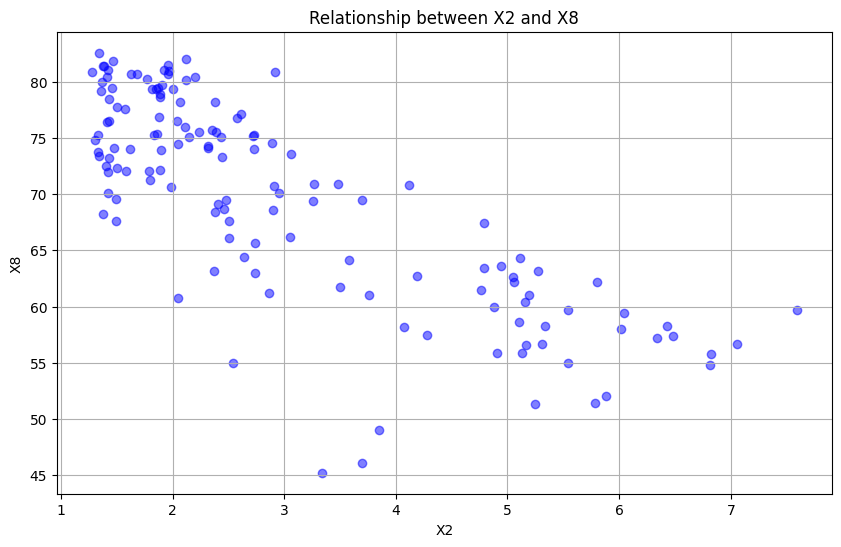

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(x2_values, x8_values, color='blue', alpha=0.5)
plt.title('Relationship between X2 and X8')
plt.xlabel('X2')
plt.ylabel('X8')
plt.grid(True)
plt.show()

In [ ]:
# Register the DataFrame as a temporary view

In [58]:
df.createOrReplaceTempView("data")

In [59]:
# Execute SQL query to filter 'X2' greater than 1.0 and 'X8' greater than 70

In [60]:
result = spark.sql("""
    SELECT X2, X8
    FROM data
    WHERE X2 > 1.0 AND X8 > 70
""")

In [61]:
# Show the result

In [62]:
result.show()

+----+----+
|  X2|  X8|
+----+----+
|2.73|75.3|
|2.24|75.5|
| 1.4|72.5|
|1.96|81.5|
|1.41|80.4|
|1.99|70.6|
|1.89|72.2|
|1.83|75.3|
|1.42|70.1|
|1.82|79.4|
|2.91|70.7|
|3.48|70.9|
| 1.9|73.9|
|1.43|73.2|
|1.68|80.7|
|1.89|78.9|
|2.43|75.1|
|1.91|79.7|
|1.43|76.5|
| 1.5|77.8|
+----+----+
only showing top 20 rows



In [63]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [64]:
# Prepare the data: Select 'X2' and 'X8' columns

In [65]:
data = df.select('X2', 'X8')

In [66]:
# Split the data into training and testing sets

In [67]:
train, test = data.randomSplit([0.7, 0.3])


In [68]:
# Define the vector assembler

In [69]:
assembler = VectorAssembler(inputCols=['X2'], outputCol='features')

In [70]:
# Transform the data using the vector assembler

In [71]:
train = assembler.transform(train)
test = assembler.transform(test)


In [ ]:
# Define the linear regression model

In [72]:
lr = LinearRegression(featuresCol='features', labelCol='X8')

In [73]:
# Train the model using the training data

In [74]:
lr_model = lr.fit(train)

In [75]:
# Make predictions on the testing data

In [76]:
predictions = lr_model.transform(test)


In [ ]:
# Evaluate the model's performance

In [77]:
evaluator = RegressionEvaluator(labelCol='X8', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)


In [ ]:
# Print the Linear Regression Model (RMSE)

In [78]:
print("Linear Regression (RMSE):", rmse)


Linear Regression (RMSE): 5.494731040281207


In [79]:
# Define the features (excluding 'X8') and the target column

In [80]:
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9']
target_column = 'X8'


In [81]:
# Define the predictors
predictors = [col for col in feature_columns if col != target_column]

In [82]:
# Create a vector assembler to combine all feature columns

In [83]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [84]:
# Define the vector assembler

In [85]:
assembler = VectorAssembler(inputCols=predictors, outputCol='features')

In [86]:
# Apply the vector assembler to the DataFrame

In [87]:
assembled_df = assembler.transform(df)


In [88]:
# Split the data into training and test sets

In [89]:
train, test = assembled_df.randomSplit([0.7, 0.3])


In [90]:
# Check if 'X8' exists in the train DataFrame

In [91]:
if 'X8' not in train.columns:
    raise ValueError("Column 'X8' does not exist in the train DataFrame.")


In [92]:
# Check if 'X8' exists in the test DataFrame

In [93]:
if 'X8' not in test.columns:
    raise ValueError("Column 'X8' does not exist in the test DataFrame.")

In [ ]:
# Define the Lasso regression model

In [94]:
lasso = LinearRegression(featuresCol='features', labelCol=target_column, elasticNetParam=1.0, regParam=0.1)

In [ ]:
# Train the model using the training data

In [95]:
lasso_model = lasso.fit(train)


In [ ]:
# Make predictions on the testing data

In [96]:
predictions = lasso_model.transform(test)


In [97]:
# Evaluate the model's performance

In [98]:
evaluator = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

In [ ]:
# Print the Lasso Regression Model (RMSE)

In [99]:
print("Lasso Regression:", rmse)

Lasso Regression: 3.039107937313391
